# Project: Train a Quadcopter How to Fly

Design an agent to fly a quadcopter, and then train it using a reinforcement learning algorithm of your choice! 

Try to apply the techniques you have learnt, but also feel free to come up with innovative ideas and test them.

## Instructions

Take a look at the files in the directory to better understand the structure of the project. 

- `task.py`: Define your task (environment) in this file.
- `agents/`: Folder containing reinforcement learning agents.
    - `policy_search.py`: A sample agent has been provided here.
    - `agent.py`: Develop your agent here.
- `physics_sim.py`: This file contains the simulator for the quadcopter.  **DO NOT MODIFY THIS FILE**.

For this project, you will define your own task in `task.py`.  Although we have provided a example task to get you started, you are encouraged to change it.  Later in this notebook, you will learn more about how to amend this file.

You will also design a reinforcement learning agent in `agent.py` to complete your chosen task.  

You are welcome to create any additional files to help you to organize your code.  For instance, you may find it useful to define a `model.py` file defining any needed neural network architectures.

## Controlling the Quadcopter

We provide a sample agent in the code cell below to show you how to use the sim to control the quadcopter.  This agent is even simpler than the sample agent that you'll examine (in `agents/policy_search.py`) later in this notebook!

The agent controls the quadcopter by setting the revolutions per second on each of its four rotors.  The provided agent in the `Basic_Agent` class below always selects a random action for each of the four rotors.  These four speeds are returned by the `act` method as a list of four floating-point numbers.  

For this project, the agent that you will implement in `agents/agent.py` will have a far more intelligent method for selecting actions!

In [1]:
import random

class Basic_Agent():
    def __init__(self, task):
        self.task = task
    
    def act(self):
        new_thrust = random.gauss(450., 25.)
        return [new_thrust + random.gauss(0., 1.) for x in range(4)]

Run the code cell below to have the agent select actions to control the quadcopter.  

Feel free to change the provided values of `runtime`, `init_pose`, `init_velocities`, and `init_angle_velocities` below to change the starting conditions of the quadcopter.

The `labels` list below annotates statistics that are saved while running the simulation.  All of this information is saved in a text file `data.txt` and stored in the dictionary `results`.  

In [2]:
%load_ext autoreload
%autoreload 2

import csv
import numpy as np
from task import Task

# Modify the values below to give the quadcopter a different starting position.
runtime = 5.                                     # time limit of the episode
init_pose = np.array([0., 0., 10., 0., 0., 0.])  # initial pose
init_velocities = np.array([0., 0., 0.])         # initial velocities
init_angle_velocities = np.array([0., 0., 0.])   # initial angle velocities
file_output = 'data.txt'                         # file name for saved results

# Setup
task = Task(init_pose, init_velocities, init_angle_velocities, runtime)
agent = Basic_Agent(task)
done = False
labels = ['time', 'x', 'y', 'z', 'phi', 'theta', 'psi', 'x_velocity',
          'y_velocity', 'z_velocity', 'phi_velocity', 'theta_velocity',
          'psi_velocity', 'rotor_speed1', 'rotor_speed2', 'rotor_speed3', 'rotor_speed4']
results = {x : [] for x in labels}

# Run the simulation, and save the results.
with open(file_output, 'w') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(labels)
    while True:
        rotor_speeds = agent.act()
        _, _, done = task.step(rotor_speeds)
        to_write = [task.sim.time] + list(task.sim.pose) + list(task.sim.v) + list(task.sim.angular_v) + list(rotor_speeds)
        for ii in range(len(labels)):
            results[labels[ii]].append(to_write[ii])
        writer.writerow(to_write)
        if done:
            break

Run the code cell below to visualize how the position of the quadcopter evolved during the simulation.

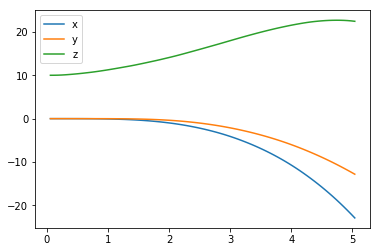

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(results['time'], results['x'], label='x')
plt.plot(results['time'], results['y'], label='y')
plt.plot(results['time'], results['z'], label='z')
plt.legend()
_ = plt.ylim()

The next code cell visualizes the velocity of the quadcopter.

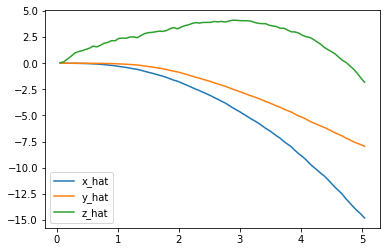

In [4]:
plt.plot(results['time'], results['x_velocity'], label='x_hat')
plt.plot(results['time'], results['y_velocity'], label='y_hat')
plt.plot(results['time'], results['z_velocity'], label='z_hat')
plt.legend()
_ = plt.ylim()

Next, you can plot the Euler angles (the rotation of the quadcopter over the $x$-, $y$-, and $z$-axes),

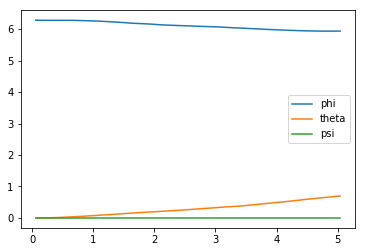

In [5]:
plt.plot(results['time'], results['phi'], label='phi')
plt.plot(results['time'], results['theta'], label='theta')
plt.plot(results['time'], results['psi'], label='psi')
plt.legend()
_ = plt.ylim()

before plotting the velocities (in radians per second) corresponding to each of the Euler angles.

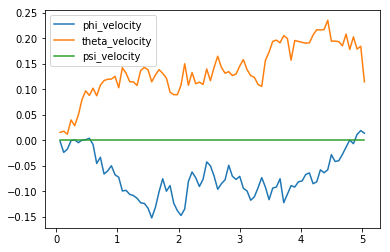

In [6]:
plt.plot(results['time'], results['phi_velocity'], label='phi_velocity')
plt.plot(results['time'], results['theta_velocity'], label='theta_velocity')
plt.plot(results['time'], results['psi_velocity'], label='psi_velocity')
plt.legend()
_ = plt.ylim()

Finally, you can use the code cell below to print the agent's choice of actions.  

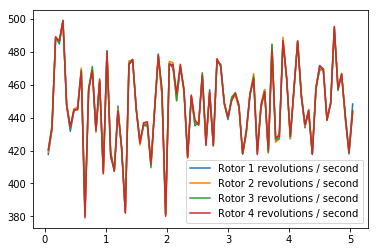

In [7]:
plt.plot(results['time'], results['rotor_speed1'], label='Rotor 1 revolutions / second')
plt.plot(results['time'], results['rotor_speed2'], label='Rotor 2 revolutions / second')
plt.plot(results['time'], results['rotor_speed3'], label='Rotor 3 revolutions / second')
plt.plot(results['time'], results['rotor_speed4'], label='Rotor 4 revolutions / second')
plt.legend()
_ = plt.ylim()

When specifying a task, you will derive the environment state from the simulator.  Run the code cell below to print the values of the following variables at the end of the simulation:
- `task.sim.pose` (the position of the quadcopter in ($x,y,z$) dimensions and the Euler angles),
- `task.sim.v` (the velocity of the quadcopter in ($x,y,z$) dimensions), and
- `task.sim.angular_v` (radians/second for each of the three Euler angles).

In [8]:
# the pose, velocity, and angular velocity of the quadcopter at the end of the episode
print(task.sim.pose)
print(task.sim.v)
print(task.sim.angular_v)

[-22.8949294  -12.81348325  22.44695639   5.93892982   0.69646041   0.        ]
[-14.81711323  -7.95391762  -1.82353899]
[ 0.01409525  0.1146989   0.        ]


In the sample task in `task.py`, we use the 6-dimensional pose of the quadcopter to construct the state of the environment at each timestep.  However, when amending the task for your purposes, you are welcome to expand the size of the state vector by including the velocity information.  You can use any combination of the pose, velocity, and angular velocity - feel free to tinker here, and construct the state to suit your task.

## The Task

A sample task has been provided for you in `task.py`.  Open this file in a new window now. 

The `__init__()` method is used to initialize several variables that are needed to specify the task.  
- The simulator is initialized as an instance of the `PhysicsSim` class (from `physics_sim.py`).  
- Inspired by the methodology in the original DDPG paper, we make use of action repeats.  For each timestep of the agent, we step the simulation `action_repeats` timesteps.  If you are not familiar with action repeats, please read the **Results** section in [the DDPG paper](https://arxiv.org/abs/1509.02971).
- We set the number of elements in the state vector.  For the sample task, we only work with the 6-dimensional pose information.  To set the size of the state (`state_size`), we must take action repeats into account.  
- The environment will always have a 4-dimensional action space, with one entry for each rotor (`action_size=4`). You can set the minimum (`action_low`) and maximum (`action_high`) values of each entry here.
- The sample task in this provided file is for the agent to reach a target position.  We specify that target position as a variable.

The `reset()` method resets the simulator.  The agent should call this method every time the episode ends.  You can see an example of this in the code cell below.

The `step()` method is perhaps the most important.  It accepts the agent's choice of action `rotor_speeds`, which is used to prepare the next state to pass on to the agent.  Then, the reward is computed from `get_reward()`.  The episode is considered done if the time limit has been exceeded, or the quadcopter has travelled outside of the bounds of the simulation.

In the next section, you will learn how to test the performance of an agent on this task.

## The Agent

The sample agent given in `agents/policy_search.py` uses a very simplistic linear policy to directly compute the action vector as a dot product of the state vector and a matrix of weights. Then, it randomly perturbs the parameters by adding some Gaussian noise, to produce a different policy. Based on the average reward obtained in each episode (`score`), it keeps track of the best set of parameters found so far, how the score is changing, and accordingly tweaks a scaling factor to widen or tighten the noise.

Run the code cell below to see how the agent performs on the sample task.

In [106]:
import sys
import pandas as pd
from agents.policy_search import PolicySearch_Agent
from task import Task

num_episodes = 1000
target_pos = np.array([0., 0., 10.])
task = Task(target_pos=target_pos)
agent = PolicySearch_Agent(task) 

for i_episode in range(1, num_episodes+1):
    state = agent.reset_episode() # start a new episode
    while True:
        action = agent.act(state) 
        next_state, reward, done = task.step(action)
        agent.step(reward, done)
        state = next_state
        if done:
            print("\rEpisode = {:4d}, score = {:7.3f} (best = {:7.3f}), noise_scale = {}".format(
                i_episode, agent.score, agent.best_score, agent.noise_scale), end="")  # [debug]
            break
    sys.stdout.flush()

Episode = 1000, score =   0.136 (best =   0.643), noise_scale = 3.25

This agent should perform very poorly on this task.  And that's where you come in!

## Define the Task, Design the Agent, and Train Your Agent!

Amend `task.py` to specify a task of your choosing.  If you're unsure what kind of task to specify, you may like to teach your quadcopter to takeoff, hover in place, land softly, or reach a target pose.  

After specifying your task, use the sample agent in `agents/policy_search.py` as a template to define your own agent in `agents/agent.py`.  You can borrow whatever you need from the sample agent, including ideas on how you might modularize your code (using helper methods like `act()`, `learn()`, `reset_episode()`, etc.).

Note that it is **highly unlikely** that the first agent and task that you specify will learn well.  You will likely have to tweak various hyperparameters and the reward function for your task until you arrive at reasonably good behavior.

As you develop your agent, it's important to keep an eye on how it's performing. Use the code above as inspiration to build in a mechanism to log/save the total rewards obtained in each episode to file.  If the episode rewards are gradually increasing, this is an indication that your agent is learning.

In [58]:
import sys
import pandas as pd

from agents.agent import DDPG
from task import Task

num_episodes = 1000
target_pos = np.array([0., 10.0, 30.0])
task = Task(target_pos=target_pos)
agent = DDPG(task) 

In [59]:
# record socres indexed by episode number
episode_num = { }

for i_episode in range(1, num_episodes+1):
    # for each episode log the computed scores
    episode_scores = { }
    state = agent.reset_episode() # start a new episode
    while True:
        action = agent.act(state) 
        next_state, reward, done = task.step(action)
        agent.step(action, reward, next_state, done)
        state = next_state
        
        episode_scores[agent.count] = agent.score
        
        if done:
            print("\rEpisode = {:4d}, score = {:7.3f} (best = {:7.3f})".format(
                i_episode, agent.score, agent.best_score), end="")  # [debug]
            
            episode_num[i_episode] = episode_scores
            break
    sys.stdout.flush()

Episode = 1000, score =  41.182 (best = 134.747)

## Plot the Rewards

Once you are satisfied with your performance, plot the episode rewards, either from a single run, or averaged over multiple runs. 

In [104]:
# plot rewards in batches of 50
batch_size = 50
batches = num_episodes // batch_size

rewards = {}
for batch_index in range(batches):
    reward_values = []
    
    for i in range(batch_size*batch_index, (batch_size*batch_index+batch_size)):
        ep = episode_num[i+1]
        last = list(ep.keys())[-1]
        reward_values.append(ep[last])
    
    rewards[batch_index+1] = np.mean(reward_values)    

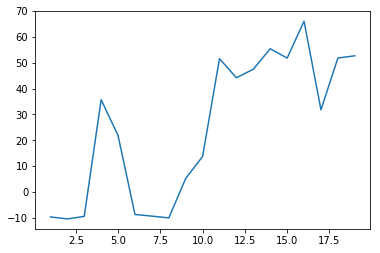

In [105]:
%matplotlib inline
plt.plot(rewards.values(), label='averaged per batch')

## Reflections

**Question 1**: Describe the task that you specified in `task.py`.  How did you design the reward function?

**Answer**:

The agent was given a task to fly to a specified point. While I elected to keep the original goal I have significantly changed how rewards are applied which has yielded a superior performing agent compared to the original task implementation. There are two mechanisms to reinforce behaviour, rewards for positive actions and penalties for non-desirable ones. 

I calculated the difference in quadcopter actual position to the required target. Using Euclidean distance to take into account for the 3D coordinate space I have attempted to reward the agent for flying in proximity to the target destination. This was computed as a boundary relative to 30% of the original the distance required to fly from the quadcopter origin position. While rewards are given to the agent for flying in this zone, the amount of reward is increased the nearer the agent gets to its target destination. This was intended to first encourage the drone to fly in the general area of the target and subsequently to approach its ultimate goal once it has reached the region of interest. 

While this step did yield a superior performing agent I found that adding an additional penalty clause was able to further improve the model. While examining the data from a failed flight I noticed that the agent experienced substantial changes in velocity near the end of the task, I believe this was caused by the quadcopter crashing. In an attempt to stop this behaviour I penalised large velocity values, this was intended to discourage crashing out of the sky, although I believe it may have had another interesting side effect. Tasks involving the control of machinery tend to perform more optimally when movements are smooth, in this case a quadcopter taking off with a large unbalanced velocity in a particular direction would probably yield an agent that takes off without a great deal of control. Discouraging large velocities would most likely result in a smoother more controlled flight, these qualities will almost certainly help the agent achieve its goals. This was achieved by applying a negative reward when the quadcopter exceeded a certain velocity threshold.


**Question 2**: Discuss your agent briefly, using the following questions as a guide:

- What learning algorithm(s) did you try? What worked best for you?
- What was your final choice of hyperparameters (such as $\alpha$, $\gamma$, $\epsilon$, etc.)?
- What neural network architecture did you use (if any)? Specify layers, sizes, activation functions, etc.

**Answer**:

I completed this project using Deep Deterministic Policy Gradients (DDPG). This was broken into two components. Actor and critic, each of these used a neural network which attempted to learn about each components respective task. 

The actor portion controls the actions that the agent will take in a given scenario. The associated neural network is comprised of four hidden layers with 32, 64, 32 nodes respectively. Each hidden layer is activated with a rectified linear unit (relu) function. Finally the output layer is mapped to the number of actions the agent can take and is applied with a sigmoid activation function.

While the critic is used to judge the agents behaviour and helps developing the agent’s ability to recognise what is deemed good behaviour that will yield rewards. The neural network leveraged by the critic portion of the agent has two input layers. States and actions each have their own input layer, however eventually these two inputs are combined into one dense layer and then passed into the output layer. Each input layer is passed through a further two layers comprising of 32 then 64 nodes with each being activated by a relu function. They are then subsequently combined into a singular layer as discussed above. This setup lets the critic distinguish between states and actions as it learns. 

These two components are combined into one DDPG agent that utilises a replay buffer to sample previous actions and rewards. This is important as some states may be relatively rare and thus the agent won’t experience them as often. The usage of a replay buffer allows the agent to make use of these past experiences throughout the learning process.
The DDPG agent also makes use of the Ornstein–Uhlenbeck Noise process as suggested in the introduction of the project. It is useful to help reduce circumstances that noise generated by the agent used in exploration actions is not so brash it may cause the quadcopter to become unstable with huge differences in input actions for similar states.

I have arrived at the following hyper parameters, this was achieved mostly with trial and error in order to find a combination that allowed the agent to learn effectively:

Discount factor (gamma): 0.97

Soft update of target parameters (tau): 0.05

Ornstein–Uhlenbeck Noise variables:

Exploration mu: 0

Exploration theta: 0.25

Exploration sigma: 0.5


**Question 3**: Using the episode rewards plot, discuss how the agent learned over time.

- Was it an easy task to learn or hard?
- Was there a gradual learning curve, or an aha moment?
- How good was the final performance of the agent? (e.g. mean rewards over the last 10 episodes)

**Answer**:

I believe on the while the task I selected was fairly easy to learn. However as my first attempt at building a reinforcement agent I thought it was best to minimise areas that could cause subtle hard to debug issues, instead focusing on the learning portion of the task. 

The x-axis of the graph is divided into 20 batches, each displaying the average score over 50 episodes. I believe during the first 7 batches the agent is interacting fairly randomly with the environment and attempting to understand what action yields greater rewards. There is clearly a spike in received reward at batch 4, however it appears the agent wasn’t able to capitalise on this knowledge at steps 5 and 6 as the rewards dissipates.

However at batch 8 the agent starts to understand how it previous behaviour is correlated to rewards received. The subsequent batches show a trend of increasing reward. As mentioned in the question I believe this is the ‘ah ha’ moment and exhibits significant evolution in the agents behaviour. At this point the agent seems to have found the proximity zone and is gradually gaining knowledge that flying closer to the target destination with the boundary will yield greater results.

While the reward received from this point onwards does fluctuate a positive trend emerges and the agent does receive more reward. Interestingly once the agent has reached the upper plateau it clearly retains its knowledge and rewards are firmly kept above 30 for the remaining episodes.  The final batch averaged over the last 50 episodes produces rewards of over 50, this value is significantly more than at the start of training and does show the agent has learnt about its environment through interactions. 


**Question 4**: Briefly summarize your experience working on this project. You can use the following prompts for ideas.

- What was the hardest part of the project? (e.g. getting started, plotting, specifying the task, etc.)
- Did you find anything interesting in how the quadcopter or your agent behaved?

**Answer**:

Starting this task was certainly the hardest part of the project. I would say it’s fairly open ended in comparison to other projects on this course. Initially it seemed quite overwhelming, however once I was able to break the problem down into the individual components it seemed more manageable. Particularly defining the task separately from the agent meant that I could keep the roles of each isolated and concentrate on solving the problem at hand.

After I had thought about the reward mechanism for the task I was able to formulate concepts that could signal both desirable and non-desirable behaviour to the agent. I think the penalty mechanism for excessive velocity was a significant turning point in this project, from this point onwards I could visibly see the agent progressing as it trained. In the future I think more refinement of the penalty mechanism could improve the agents learning, perhaps by applying restrictions to extreme angles of rotation. This may further contribute to a smooth controlled flight that would allow the agent to explore the environment more efficiently.

It was interesting to see once it learnt how to yield reward it still attempted to explore and perform other actions. Perhaps if I had trained it over more episodes it would have escaped the plateau of learning it appeared to find at batch 13. Obviously this exploration behaviour is required for the agent not to just exploit its current knowledge and find strategies that yield greater rewards than are attainable with only this existing knowledge. 

